# Feature Engineering

## 1. Business Problem

Once the features are specified, a machine learning model has been developed to predict whether individuals have diabetes. Prior to developing the model, the necessary data analysis and feature engineering steps have been detailed.

## 2. About Dataset

The dataset is part of a large dataset maintained by the National Institute of Diabetes and Digestive and Kidney Diseases in the USA. The data was used for a diabetes study conducted on Pima Indian women aged 21 and older living in Phoenix, the fifth-largest city in Arizona, USA. The target variable is specified as ‘outcome’; 1 indicates a positive diabetes test result, while 0 indicates a negative result.

* **Pregnancies:** Number of pregnancies
* **Glucose:** 2-hour plasma glucose concentration in an oral glucose tolerance test
* **Blood Pressure:** Blood Pressure (Diastolic) (mm Hg)
* **SkinThickness:** Skin Thickness
* **Insulin:** 2-hour serum insulin (mu U/ml)
* **DiabetesPedigreeFunction:** Diabetes Pedigree Function
* **BMI:** Body Mass Index
* **Age:** Age (years)
* **Outcome:** Whether the individual has the disease (1) or not (0)


## 3. Data Preparing & Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install missingno as msno
import numpy as np
from datetime import date
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action="ignore")


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
# defining a function to upload the dataset

def load():
    df_ = pd.read_csv('/kaggle/input/diabetes-data/diabetes.csv')
    df = df_.copy()
    return df

In [3]:
df = load() # upload the dataset
df.head() # #display first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape #display the shape of the dataset

(768, 9)

In [5]:
df.info() #info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.columns # display the names of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

In [8]:
df.isnull().sum() # null count

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.isnull().values.any() # checking the null values in the dataset 

False

In [10]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### HEAD ##################")
    print(dataframe.head(head))
    print("#################### TAIL #################")
    print(dataframe.tail(head))
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print("#################### NA SUM ###################")
    print(dataframe.isnull().sum())
    print("#################### QUANTILES ###############")
    print(dataframe.describe([0,0.01,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99,1]).T)

check_df(df)

##################### SHAPE ####################
(768, 9)
#################### COLUMNS ###################
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')
#################### INDEX ###################
RangeIndex(start=0, stop=768, step=1)
#################### TYPES ##################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
#################### HEAD ##################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1          

In [11]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols , cat_but_car = grab_col_names(df)

In [12]:
cat_cols # categorical columns

['Outcome']

In [13]:
num_cols # numeric columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [14]:
cat_but_car # categorical type but cardinal columns

[]

### 3.1 Analysis of Categorical Variables

In [15]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"################################# {col} Counts - Ratio #####################################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("################################# Unique Variable Counts #####################################")
    print(f"{col} : {dataframe[col_name].nunique()}")
    print(f"############################## {col} Counts - Ratio Visualizing ############################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

################################# Outcome Counts - Ratio #####################################
         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896
################################# Unique Variable Counts #####################################
Outcome : 2
############################## Outcome Counts - Ratio Visualizing ############################


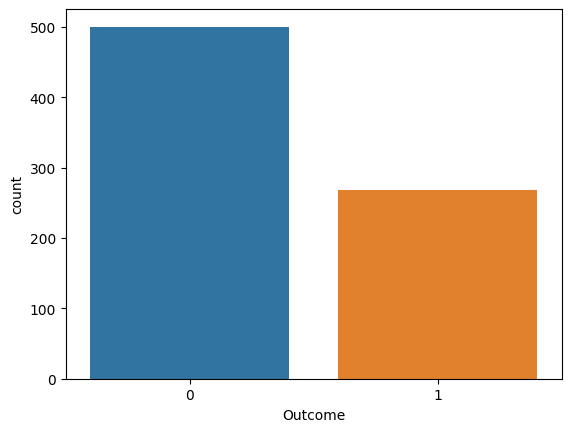

In [16]:
# applying the function:

for col in cat_cols:
    cat_summary(df, col, plot = True)

### 3.2 Analysis of Numerical Variables

In [17]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist()
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

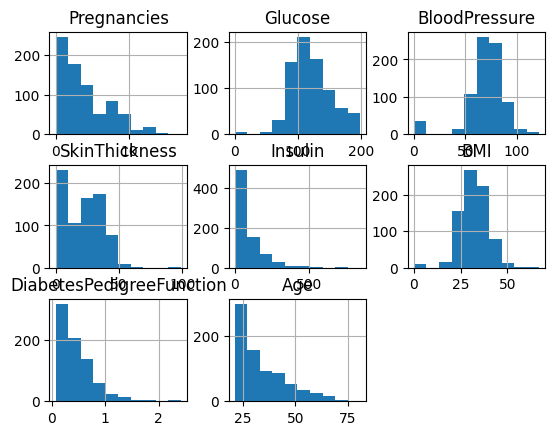

#################### QUANTILES ###############
                           count    mean     std    min     5%    10%    20%     50%     60%     80%     90%     95%     99%     max
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  1.000   3.000   4.000   7.000   9.000  10.000  13.000  17.000
Glucose                  768.000 120.895  31.973  0.000 79.000 85.000 95.000 117.000 125.000 147.000 167.000 181.000 196.000 199.000
BloodPressure            768.000  69.105  19.356  0.000 38.700 54.000 60.000  72.000  74.000  82.000  88.000  90.000 106.000 122.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000  23.000  27.000  35.000  40.000  44.000  51.330  99.000
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000  30.500  72.200 150.000 210.000 293.000 519.900 846.000
BMI                      768.000  31.993   7.884  0.000 21.800 23.600 25.900  32.000  33.700  37.800  41.500  44.395  50.759  67.100
DiabetesPedigreeFuncti

In [18]:
# applying the function:

num_summary(df, num_cols, plot = True)

### 3.3 Target Variable Analysis

In [19]:
# Target - Categorical Variables

In [20]:
# defining a function to check summary of the target and categorical variables:

def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"Target_Mean": dataframe.groupby(categorical_col)[target].mean()}), end = "\n\n\n")


In [21]:
# applying the function:

for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col)

         Target_Mean
Outcome             
0              0.000
1              1.000




In [22]:
# Target - Numerical Variables

In [23]:
# defining a function to check summary of the target and numerical variables:

def target_summary_with_num(dataframe,target,numerical_col):
    print(f"##################### {numerical_col} Describe ####################################")
    print(pd.DataFrame({numerical_col: dataframe[numerical_col].describe().T}), end = "\n\n\n")
    print(print(f"####################### {target} - {numerical_col} Mean #################################"))
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end = "\n\n\n")

In [24]:
# applying the function:

for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

##################### Pregnancies Describe ####################################
       Pregnancies
count      768.000
mean         3.845
std          3.370
min          0.000
25%          1.000
50%          3.000
75%          6.000
max         17.000


####################### Outcome - Pregnancies Mean #################################
None
         Pregnancies
Outcome             
0              3.298
1              4.866


##################### Glucose Describe ####################################
       Glucose
count  768.000
mean   120.895
std     31.973
min      0.000
25%     99.000
50%    117.000
75%    140.250
max    199.000


####################### Outcome - Glucose Mean #################################
None
         Glucose
Outcome         
0        109.980
1        141.257


##################### BloodPressure Describe ####################################
       BloodPressure
count        768.000
mean          69.105
std           19.356
min            0.000
25%           6

### 3.4 Outlier Analysis

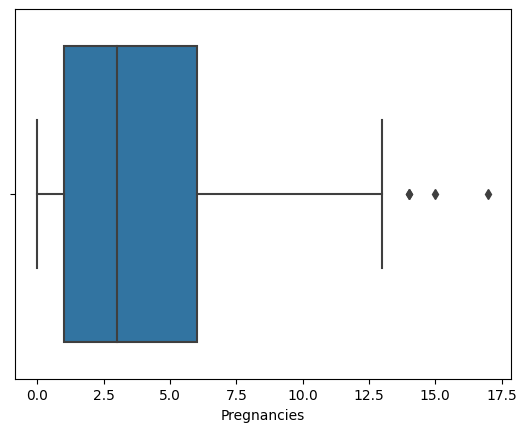

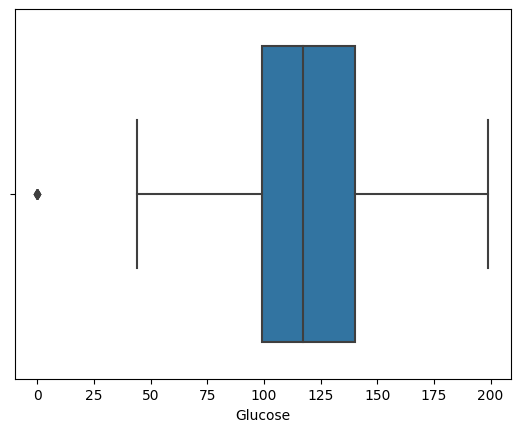

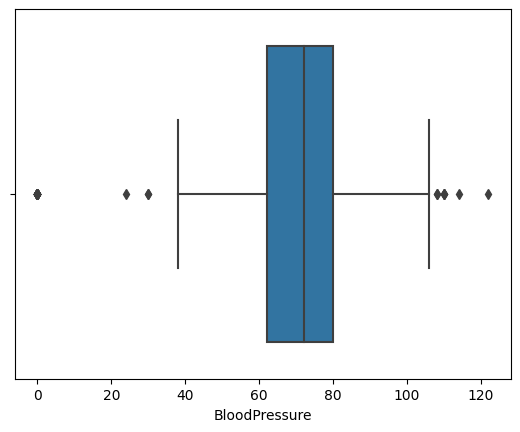

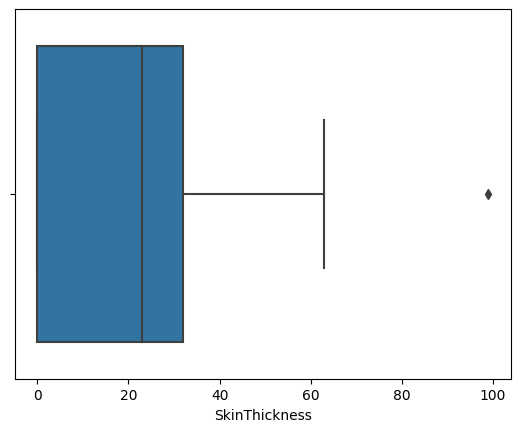

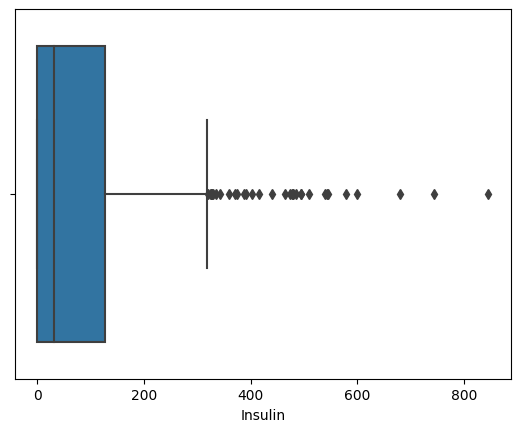

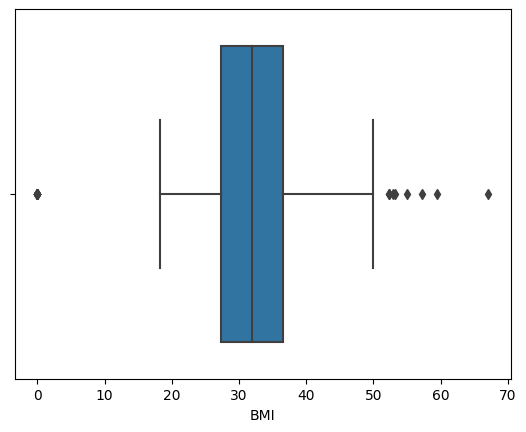

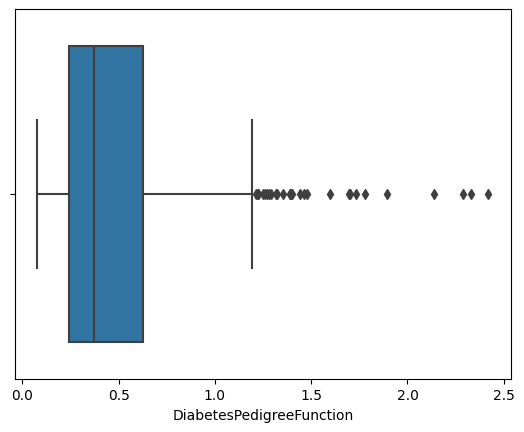

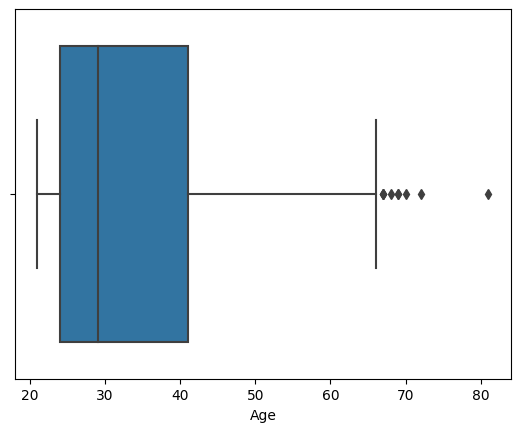

In [25]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()
    

In [26]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.05,q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [27]:
# checking outlier in the dataframe:

def check_outlier(dataframe,col_name):
    low, up = outlier_thresholds(df,col_name)
    if dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)].any(axis=None):
        return True
    else:
        return False

In [28]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(df,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col in col_list:
        if check_outlier(df, col):
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
Pregnancies : low: -15.0, up: 25.0
Glucose : low: -74.0, up: 334.0
BloodPressure : low: -38.249999999999986, up: 166.95
SkinThickness : low: -66.0, up: 110.0
Insulin : low: -439.5, up: 732.5
BMI : low: -12.09249999999999, up: 78.2875
DiabetesPedigreeFunction : low: -1.3483999999999996, up: 2.621599999999999
Age : low: -34.5, up: 113.5


################# Numeric Columns Have Outliers  #####################
['Insulin']
count_columns: 1

################# Numeric Columns Have NOT Outliers #####################
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']
count_columns: 7



In [29]:
have_outliers

['Insulin']

In [30]:
# to grab outlier values:

def grab_outliers(dataframe,col_name, index = False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] > up) | (dataframe[col_name] < low))].shape[0] > 10 :
        print(dataframe[(dataframe[col_name] > up) | (dataframe[col_name] < low)])
    else:
        print(dataframe[((dataframe[col_name] > up) | (dataframe[col_name] < low))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] > up) | (dataframe[col_name] < low))].index
        return outlier_index

In [31]:
for col in have_outliers:
    grab_outliers(df,col,index=True)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
13             1      189             60             23      846 30.100                     0.398   59        1
228            4      197             70             39      744 36.700                     2.329   31        0


### 3.5 Correlation Analysis

In [32]:
# calculating correlation :

corr = df[num_cols].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000


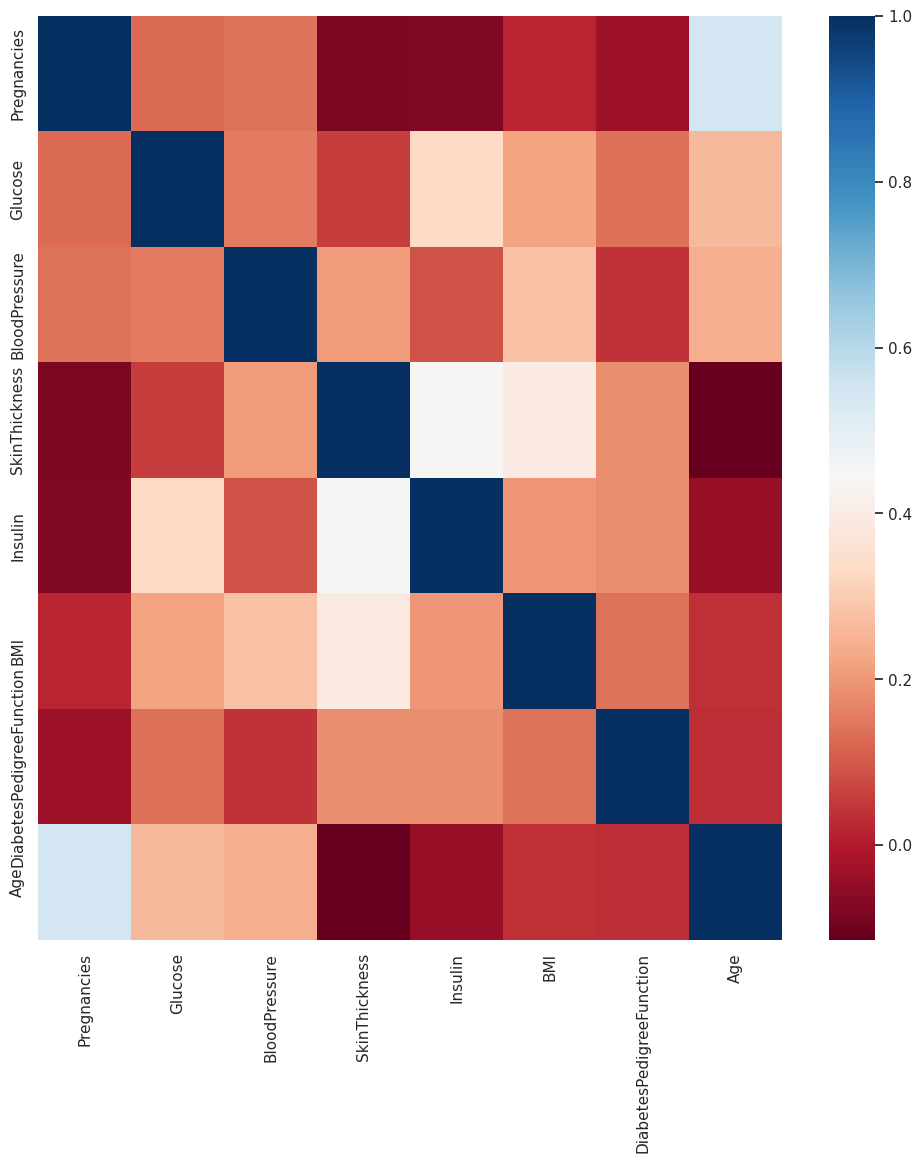

In [33]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr,cmap = "RdBu")
plt.show()

In [34]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [35]:
# applying the function:

high_correlated_cols(df,plot=False)

[]

## 4. Base Model

> **NOTE:**
To assess the model after implementing the changes we plan to make, we are checking the validation metrics of the model on the data without applying any operations yet.

In [36]:
# creating the base model:

y = df["Outcome"] # target
X = df.drop("Outcome", axis=1) # train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24) # split the data

rf_model = RandomForestClassifier(random_state=24).fit(X_train, y_train) # fitting model

In [37]:
# prediction:

y_pred = rf_model.predict(X_test)

In [38]:
# validation metrics:

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.68
Recall: 0.636
Precision: 0.4
F1: 0.49
Auc: 0.67


## 5. Feature Engineering

### 5.1 Missing Values 

In [39]:
# checking columns which their minimum values are zero:

zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]

zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [40]:
# Replacing observation values containing 0 with NaN for variables where 0 exists across observation units:

for col in zero_columns:
    df[col].replace(0, np.nan, inplace=True)

In [41]:
df[col].isnull().sum()

11

In [42]:
# fill the null values:

for col in zero_columns:
    df[col].fillna(df[col].median(), inplace = True)

In [43]:
df[col].isnull().sum()

0

### 5.2 Outlier Suppression

In [44]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [45]:
#applying the function:

for col in have_outliers:
    replace_with_thresholds(df,col)

In [46]:
df.describe().T # descriptive statistics again

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,121.656,30.438,44.000,99.750,117.000,140.250,199.000
BloodPressure,768.000,72.387,12.097,24.000,64.000,72.000,80.000,122.000
SkinThickness,768.000,29.108,8.791,7.000,25.000,29.000,32.000,99.000
Insulin,768.000,140.285,83.691,14.000,121.500,125.000,127.250,657.500
BMI,768.000,32.455,6.875,18.200,27.500,32.300,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


### 5.3 Feature Extraction

In [47]:
# Age- Pregnancy

# Age ve Pregnancies quantiles:
age_q25 = df["Age"].quantile(0.25)
age_q75 = df["Age"].quantile(0.75)
preg_q25 = df["Pregnancies"].quantile(0.25)
preg_q75 = df["Pregnancies"].quantile(0.75)

# Mature:
df.loc[(df["Age"] > age_q75) & (df["Pregnancies"] > preg_q75), "New_Age_Pregnancies"] = "mature and high preg"
df.loc[(df["Age"] > age_q75) & (df["Pregnancies"] > preg_q25) & (df["Pregnancies"] <= preg_q75), "New_Age_Pregnancies"] = "mature and mid preg"
df.loc[(df["Age"] > age_q75) & (df["Pregnancies"] <= preg_q25) & (df["Pregnancies"] > 0), "New_Age_Pregnancies"] = "mature and low preg"
df.loc[(df["Age"] > age_q75) & (df["Pregnancies"] == 0), "New_Age_Pregnancies"] = "mature and no preg"
df.loc[(df["Age"] > age_q75) & ((df["Age"] < 0)|(df["Pregnancies"] < 0)), "New_Age_Pregnancies"] = "impossible"

# Senior:
df.loc[(df["Age"] > age_q25) & (df["Age"] <= age_q75) & (df["Pregnancies"] > preg_q75), "New_Age_Pregnancies"] = "senior and high preg"
df.loc[(df["Age"] > age_q25) & (df["Age"] <= age_q75) & (df["Pregnancies"] > preg_q25) & (df["Pregnancies"] <= preg_q75), "New_Age_Pregnancies"] = "senior and mid preg"
df.loc[(df["Age"] > age_q25) & (df["Age"] <= age_q75) & (df["Pregnancies"] <= preg_q25) & (df["Pregnancies"] > 0), "New_Age_Pregnancies"] = "senior and low preg"
df.loc[(df["Age"] > age_q25) & (df["Age"] <= age_q75) & (df["Pregnancies"] == 0), "New_Age_Pregnancies"] = "senior and no preg"
df.loc[(df["Age"] > age_q25) & (df["Age"] <= age_q75) & ((df["Age"] < 0)|(df["Pregnancies"] < 0)), "New_Age_Pregnancies"] = "impossible"

# Young:
df.loc[(df["Age"] <= age_q25) & (df["Age"] > 18) & (df["Pregnancies"] > preg_q75), "New_Age_Pregnancies"] = "young and high preg"
df.loc[(df["Age"] <= age_q25) & (df["Age"] > 18) & (df["Pregnancies"] > preg_q25) & (df["Pregnancies"] <= preg_q75), "New_Age_Pregnancies"] = "young and mid preg"
df.loc[(df["Age"] <= age_q25) & (df["Age"] > 18) & (df["Pregnancies"] <= preg_q25) & (df["Pregnancies"] > 0), "New_Age_Pregnancies"] = "young and low preg"
df.loc[(df["Age"] <= age_q25) & (df["Age"] > 18) & (df["Pregnancies"] == 0), "New_Age_Pregnancies"] = "young and no preg"
df.loc[(df["Age"] <= age_q25) & (df["Age"] > 18) & ((df["Age"] < 0)|(df["Pregnancies"] < 0)), "New_Age_Pregnancies"] = "impossible"


In [48]:
df["New_Age_Pregnancies"].value_counts()

New_Age_Pregnancies
senior and mid preg     206
mature and high preg     93
young and mid preg       90
senior and high preg     74
young and low preg       72
mature and mid preg      57
young and no preg        55
senior and low preg      51
senior and no preg       46
mature and low preg      12
mature and no preg       10
young and high preg       2
Name: count, dtype: int64

In [49]:
# Insulin & Glucose

# Insulin ve Glucose quantiles:
insulin_q25 = df["Insulin"].quantile(0.25)
insulin_q75 = df["Insulin"].quantile(0.75)
glucose_q25 = df["Glucose"].quantile(0.25)
glucose_q75 = df["Glucose"].quantile(0.75)

# High Insulin
df.loc[(df["Insulin"] > insulin_q75) & (df["Glucose"] > glucose_q75), "New_Insulin_Glucose"] = "high insulin and high glucose"
df.loc[(df["Insulin"] > insulin_q75) & (df["Glucose"] > glucose_q25) & (df["Glucose"] <= glucose_q75), "New_Insulin_Glucose"] = "high insulin and mid glucose"
df.loc[(df["Insulin"] > insulin_q75) & (df["Glucose"] <= glucose_q25) & (df["Glucose"] > 0), "New_Insulin_Glucose"] = "high insulin and low glucose"
df.loc[(df["Insulin"] > insulin_q75) & ((df["Insulin"] <= 0) | (df["Glucose"] <= 0)), "New_Insulin_Glucose"] = "impossible"

# Mid Insulin
df.loc[(df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75) & (df["Glucose"] > glucose_q75), "New_Insulin_Glucose"] = "mid insulin and high glucose"
df.loc[(df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75) & (df["Glucose"] > glucose_q25) & (df["Glucose"] <= glucose_q75), "New_Insulin_Glucose"] = "mid insulin and mid glucose"
df.loc[(df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75) & (df["Glucose"] <= glucose_q25) & (df["Glucose"] > 0), "New_Insulin_Glucose"] = "mid insulin and low glucose"
df.loc[(df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75) & ((df["Insulin"] <= 0) | (df["Glucose"] <= 0)), "New_Insulin_Glucose"] = "impossible"

# Low Insulin
df.loc[(df["Insulin"] <= insulin_q25) & (df["Glucose"] > glucose_q75), "New_Insulin_Glucose"] = "low insulin and high glucose"
df.loc[(df["Insulin"] <= insulin_q25)  & (df["Glucose"] > glucose_q25) & (df["Glucose"] <= glucose_q75), "New_Insulin_Glucose"] = "low insulin and mid glucose"
df.loc[(df["Insulin"] <= insulin_q25)  & (df["Glucose"] <= glucose_q25) & (df["Glucose"] > 0), "New_Insulin_Glucose"] = "low insulin and low glucose"
df.loc[(df["Insulin"] <= insulin_q25)  & ((df["Insulin"] <= 0) | (df["Glucose"] <= 0)), "New_Insulin_Glucose"] = "impossible"

In [50]:
df["New_Insulin_Glucose"].value_counts()

New_Insulin_Glucose
mid insulin and mid glucose      201
high insulin and mid glucose     100
low insulin and low glucose       93
mid insulin and low glucose       92
mid insulin and high glucose      91
high insulin and high glucose     85
low insulin and mid glucose       83
low insulin and high glucose      16
high insulin and low glucose       7
Name: count, dtype: int64

In [51]:
# BloodPressure & BMI

# BloodPressure ve BMI quantiles:
blood_q25 = df["BloodPressure"].quantile(0.25)
blood_q75 = df["BloodPressure"].quantile(0.75)
bmi_q25 = df["BMI"].quantile(0.25)
bmi_q75 = df["BMI"].quantile(0.75)

# High BloodPressure
df.loc[(df["BloodPressure"] > blood_q75) & (df["BMI"] > bmi_q75), "New_BloodPressure_BMI"] = "high BloodPressure and high bmi"
df.loc[(df["BloodPressure"] > blood_q75) & (df["BMI"] > bmi_q25) & (df["BMI"] <= bmi_q75), "New_BloodPressure_BMI"] = "high BloodPressure and mid bmi"
df.loc[(df["BloodPressure"] > blood_q75) & (df["BMI"] <= bmi_q25) & (df["BMI"] > 0), "New_BloodPressure_BMI"] = "high BloodPressure and low bmi"
df.loc[(df["BloodPressure"] > blood_q75) & (df["BMI"] <= 0), "New_BloodPressure_BMI"] = "impossible"

# Mid BloodPressure
df.loc[(df["BloodPressure"] > blood_q25) & (df["BloodPressure"] <= blood_q75) & (df["BMI"] > bmi_q75), "New_BloodPressure_BMI"] = "mid BloodPressure and high bmi"
df.loc[(df["BloodPressure"] > blood_q25) & (df["BloodPressure"] <= blood_q75) & (df["BMI"] > bmi_q25) & (df["BMI"] <= bmi_q75), "New_BloodPressure_BMI"] = "mid BloodPressure and mid bmi"
df.loc[(df["BloodPressure"] > blood_q25) & (df["BloodPressure"] <= blood_q75) & (df["BMI"] <= bmi_q25) & (df["BMI"] > 0), "New_BloodPressure_BMI"] = "mid BloodPressure and low bmi"
df.loc[(df["BloodPressure"] > blood_q25) & (df["BloodPressure"] <= blood_q75) & (df["BMI"] <= 0), "New_BloodPressure_BMI"] = "impossible"

# Low BloodPressure
df.loc[(df["BloodPressure"] <= blood_q25)  & (df["BMI"] > bmi_q75), "New_BloodPressure_BMI"] = "low BloodPressure and high bmi"
df.loc[(df["BloodPressure"] <= blood_q25)  & (df["BMI"] > bmi_q25) & (df["BMI"] <= bmi_q75), "New_BloodPressure_BMI"] = "low BloodPressure and mid bmi"
df.loc[(df["BloodPressure"] <= blood_q25) & (df["BMI"] <= bmi_q25) & (df["BMI"] > 0), "New_BloodPressure_BMI"] = "low BloodPressure and low bmi"
df.loc[(df["BloodPressure"] <= blood_q25) & (df["BMI"] <= 0), "New_BloodPressure_BMI"] = "impossible"


In [52]:
df["New_BloodPressure_BMI"].value_counts()

New_BloodPressure_BMI
mid BloodPressure and mid bmi      203
low BloodPressure and mid bmi      104
mid BloodPressure and high bmi     102
mid BloodPressure and low bmi       97
high BloodPressure and mid bmi      80
low BloodPressure and low bmi       77
high BloodPressure and high bmi     66
low BloodPressure and high bmi      20
high BloodPressure and low bmi      19
Name: count, dtype: int64

In [53]:
# SkinThickness & Insulin

# SkinThickness ve Insulin quantiles:
skin_q25 = df["SkinThickness"].quantile(0.25)
skin_q75 = df["SkinThickness"].quantile(0.75)
insulin_q25 = df["Insulin"].quantile(0.25)
insulin_q75 = df["Insulin"].quantile(0.75)

# High SkinThickness
df.loc[(df["SkinThickness"] > skin_q75) & (df["Insulin"] > insulin_q75), "New_SkinThickness_Insulin"] = "high SkinThickness and high insulin"
df.loc[(df["SkinThickness"] > skin_q75) & (df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75), "New_SkinThickness_Insulin"] = "high SkinThickness and mid insulin"
df.loc[(df["SkinThickness"] > skin_q75) & (df["Insulin"] <= insulin_q25) & (df["Insulin"] > 0), "New_SkinThickness_Insulin"] = "high SkinThickness and low insulin"
df.loc[(df["SkinThickness"] > skin_q75) & ((df["SkinThickness"] <= 0) | (df["Insulin"] <= 0)), "New_SkinThickness_Insulin"] = "impossible"

# Mid SkinThickness
df.loc[(df["SkinThickness"] > skin_q25) & (df["SkinThickness"] <= skin_q75) & (df["Insulin"] > insulin_q75), "New_SkinThickness_Insulin"] = "mid SkinThickness and high insulin"
df.loc[(df["SkinThickness"] > skin_q25) & (df["SkinThickness"] <= skin_q75) & (df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75), "New_SkinThickness_Insulin"] = "mid SkinThickness and mid insulin"
df.loc[(df["SkinThickness"] > skin_q25) & (df["SkinThickness"] <= skin_q75) & (df["Insulin"] <= insulin_q25) & (df["Insulin"] > 0), "New_SkinThickness_Insulin"] = "mid SkinThickness and low insulin"
df.loc[(df["SkinThickness"] > skin_q25) & (df["SkinThickness"] <= skin_q75) & ((df["SkinThickness"] <= 0) | (df["Insulin"] <= 0)), "New_SkinThickness_Insulin"] = "impossible"

# Low SkinThickness
df.loc[(df["SkinThickness"] <= skin_q25)  & (df["Insulin"] > insulin_q75), "New_SkinThickness_Insulin"] = "low SkinThickness and high insulin"
df.loc[(df["SkinThickness"] <= skin_q25)  & (df["Insulin"] > insulin_q25) & (df["Insulin"] <= insulin_q75), "New_SkinThickness_Insulin"] = "low SkinThickness and mid insulin"
df.loc[(df["SkinThickness"] <= skin_q25) & (df["Insulin"] <= insulin_q25) & (df["Insulin"] > 0), "New_SkinThickness_Insulin"] = "low SkinThickness and low insulin"
df.loc[(df["SkinThickness"] <= skin_q25) &  ((df["SkinThickness"] <= 0) | (df["Insulin"] <= 0)), "New_SkinThickness_Insulin"] = "impossible"


In [54]:
df["New_SkinThickness_Insulin"].value_counts()

New_SkinThickness_Insulin
mid SkinThickness and mid insulin      286
low SkinThickness and low insulin       95
high SkinThickness and high insulin     92
low SkinThickness and mid insulin       53
low SkinThickness and high insulin      52
high SkinThickness and low insulin      51
mid SkinThickness and high insulin      48
mid SkinThickness and low insulin       46
high SkinThickness and mid insulin      45
Name: count, dtype: int64

In [55]:
# BMI < 18,5 underweight, 18.5 < bmi < 24.9 normal, 24.9 < bmi < 29.9 Overweight and bmi > 30 Obese

df['New_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [56]:
df["New_BMI"].value_counts()

New_BMI
Obese          483
Overweight     179
Healthy        102
Underweight      4
Name: count, dtype: int64

In [57]:
# glucose*insulin:

df["New_Glucose*Insulin"] = df["Glucose"] * df["Insulin"]

In [58]:
# glucose*pregnancies:

df["New_Glucose*Pregnancies"] = df["Glucose"] * df["Pregnancies"]

In [59]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Age_Pregnancies,New_Insulin_Glucose,New_BloodPressure_BMI,New_SkinThickness_Insulin,New_BMI,New_Glucose*Insulin,New_Glucose*Pregnancies
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,mature and mid preg,mid insulin and high glucose,mid BloodPressure and mid bmi,high SkinThickness and mid insulin,Obese,18500.000,888.000
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,senior and low preg,mid insulin and low glucose,mid BloodPressure and low bmi,mid SkinThickness and mid insulin,Overweight,10625.000,85.000
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,senior and high preg,mid insulin and high glucose,low BloodPressure and low bmi,mid SkinThickness and mid insulin,Healthy,22875.000,1464.000
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,young and low preg,low insulin and low glucose,mid BloodPressure and mid bmi,low SkinThickness and low insulin,Overweight,8366.000,89.000
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,senior and no preg,high insulin and mid glucose,low BloodPressure and high bmi,high SkinThickness and high insulin,Obese,23016.000,0.000


### 5.4 Encoding

In [60]:
# for categorical columns:

In [61]:
# defining a function for one-hot encoding:

def one_hot_encoder(dataframe,cols,drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cols, drop_first=drop_first)
    return dataframe

In [62]:
# creating a list to apply one-hot encoding:

ohe_cols = [col for col in df.columns if (df[col].dtype not in ["float64","int64"]) & (df[col].nunique() > 2) & (col not in ["Outcome"])]
ohe_cols

['New_Age_Pregnancies',
 'New_Insulin_Glucose',
 'New_BloodPressure_BMI',
 'New_SkinThickness_Insulin',
 'New_BMI']

In [63]:
# applying the function:

df = one_hot_encoder(df,ohe_cols)

In [64]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose*Insulin,New_Glucose*Pregnancies,New_Age_Pregnancies_mature and low preg,New_Age_Pregnancies_mature and mid preg,New_Age_Pregnancies_mature and no preg,New_Age_Pregnancies_senior and high preg,New_Age_Pregnancies_senior and low preg,New_Age_Pregnancies_senior and mid preg,New_Age_Pregnancies_senior and no preg,New_Age_Pregnancies_young and high preg,New_Age_Pregnancies_young and low preg,New_Age_Pregnancies_young and mid preg,New_Age_Pregnancies_young and no preg,New_Insulin_Glucose_high insulin and low glucose,New_Insulin_Glucose_high insulin and mid glucose,New_Insulin_Glucose_low insulin and high glucose,New_Insulin_Glucose_low insulin and low glucose,New_Insulin_Glucose_low insulin and mid glucose,New_Insulin_Glucose_mid insulin and high glucose,New_Insulin_Glucose_mid insulin and low glucose,New_Insulin_Glucose_mid insulin and mid glucose,New_BloodPressure_BMI_high BloodPressure and low bmi,New_BloodPressure_BMI_high BloodPressure and mid bmi,New_BloodPressure_BMI_low BloodPressure and high bmi,New_BloodPressure_BMI_low BloodPressure and low bmi,New_BloodPressure_BMI_low BloodPressure and mid bmi,New_BloodPressure_BMI_mid BloodPressure and high bmi,New_BloodPressure_BMI_mid BloodPressure and low bmi,New_BloodPressure_BMI_mid BloodPressure and mid bmi,New_SkinThickness_Insulin_high SkinThickness and low insulin,New_SkinThickness_Insulin_high SkinThickness and mid insulin,New_SkinThickness_Insulin_low SkinThickness and high insulin,New_SkinThickness_Insulin_low SkinThickness and low insulin,New_SkinThickness_Insulin_low SkinThickness and mid insulin,New_SkinThickness_Insulin_mid SkinThickness and high insulin,New_SkinThickness_Insulin_mid SkinThickness and low insulin,New_SkinThickness_Insulin_mid SkinThickness and mid insulin,New_BMI_Healthy,New_BMI_Overweight,New_BMI_Obese
0,6,148.000,72.000,35.000,125.000,33.600,0.627,50,1,18500.000,888.000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,1,85.000,66.000,29.000,125.000,26.600,0.351,31,0,10625.000,85.000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
2,8,183.000,64.000,29.000,125.000,23.300,0.672,32,1,22875.000,1464.000,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,8366.000,89.000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1,23016.000,0.000,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### 5.5 Feature Scaling

In [65]:
# for numerical columns:

In [66]:
# numerical columns:

num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [67]:
# standardization of numerical variables:

ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])

In [68]:
df.head() # display first 5 columns again

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose*Insulin,New_Glucose*Pregnancies,New_Age_Pregnancies_mature and low preg,New_Age_Pregnancies_mature and mid preg,New_Age_Pregnancies_mature and no preg,New_Age_Pregnancies_senior and high preg,New_Age_Pregnancies_senior and low preg,New_Age_Pregnancies_senior and mid preg,New_Age_Pregnancies_senior and no preg,New_Age_Pregnancies_young and high preg,New_Age_Pregnancies_young and low preg,New_Age_Pregnancies_young and mid preg,New_Age_Pregnancies_young and no preg,New_Insulin_Glucose_high insulin and low glucose,New_Insulin_Glucose_high insulin and mid glucose,New_Insulin_Glucose_low insulin and high glucose,New_Insulin_Glucose_low insulin and low glucose,New_Insulin_Glucose_low insulin and mid glucose,New_Insulin_Glucose_mid insulin and high glucose,New_Insulin_Glucose_mid insulin and low glucose,New_Insulin_Glucose_mid insulin and mid glucose,New_BloodPressure_BMI_high BloodPressure and low bmi,New_BloodPressure_BMI_high BloodPressure and mid bmi,New_BloodPressure_BMI_low BloodPressure and high bmi,New_BloodPressure_BMI_low BloodPressure and low bmi,New_BloodPressure_BMI_low BloodPressure and mid bmi,New_BloodPressure_BMI_mid BloodPressure and high bmi,New_BloodPressure_BMI_mid BloodPressure and low bmi,New_BloodPressure_BMI_mid BloodPressure and mid bmi,New_SkinThickness_Insulin_high SkinThickness and low insulin,New_SkinThickness_Insulin_high SkinThickness and mid insulin,New_SkinThickness_Insulin_low SkinThickness and high insulin,New_SkinThickness_Insulin_low SkinThickness and low insulin,New_SkinThickness_Insulin_low SkinThickness and mid insulin,New_SkinThickness_Insulin_mid SkinThickness and high insulin,New_SkinThickness_Insulin_mid SkinThickness and low insulin,New_SkinThickness_Insulin_mid SkinThickness and mid insulin,New_BMI_Healthy,New_BMI_Overweight,New_BMI_Obese
0,0.640,0.866,-0.032,0.671,-0.183,0.167,0.468,1.426,1,18500.000,888.000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
1,-0.845,-1.205,-0.528,-0.012,-0.183,-0.852,-0.365,-0.191,0,10625.000,85.000,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False
2,1.234,2.017,-0.694,-0.012,-0.183,-1.333,0.604,-0.106,1,22875.000,1464.000,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,-0.845,-1.074,-0.528,-0.695,-0.553,-0.634,-0.921,-1.042,0,8366.000,89.000,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False
4,-1.142,0.504,-2.679,0.671,0.331,1.549,5.485,-0.020,1,23016.000,0.000,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


## 6. Modeling

In [69]:
# creating the model:

y = df["Outcome"] # target
X = df.drop("Outcome", axis=1) # train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24) # split the data

rf_model = RandomForestClassifier(random_state=24).fit(X_train, y_train) # fitting model

In [70]:
# prediction:

y_pred = rf_model.predict(X_test)

## 7. Model Performance Evaluation

In [71]:
# validation metrics:

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.68
Recall: 0.619
Precision: 0.44
F1: 0.52
Auc: 0.66


## 8. Feature Importance

    Value                                            Feature
1   0.161                                            Glucose
8   0.126                                New_Glucose*Insulin
9   0.085                            New_Glucose*Pregnancies
5   0.073                                                BMI
7   0.072                                                Age
6   0.068                           DiabetesPedigreeFunction
4   0.052                                            Insulin
0   0.043                                        Pregnancies
2   0.043                                      BloodPressure
3   0.042                                      SkinThickness
47  0.023                                      New_BMI_Obese
26  0.020   New_Insulin_Glucose_mid insulin and high glucose
13  0.010           New_Age_Pregnancies_senior and high preg
36  0.010  New_BloodPressure_BMI_mid BloodPressure and mi...
30  0.009  New_BloodPressure_BMI_high BloodPressure and m...
27  0.008    New_Insulin

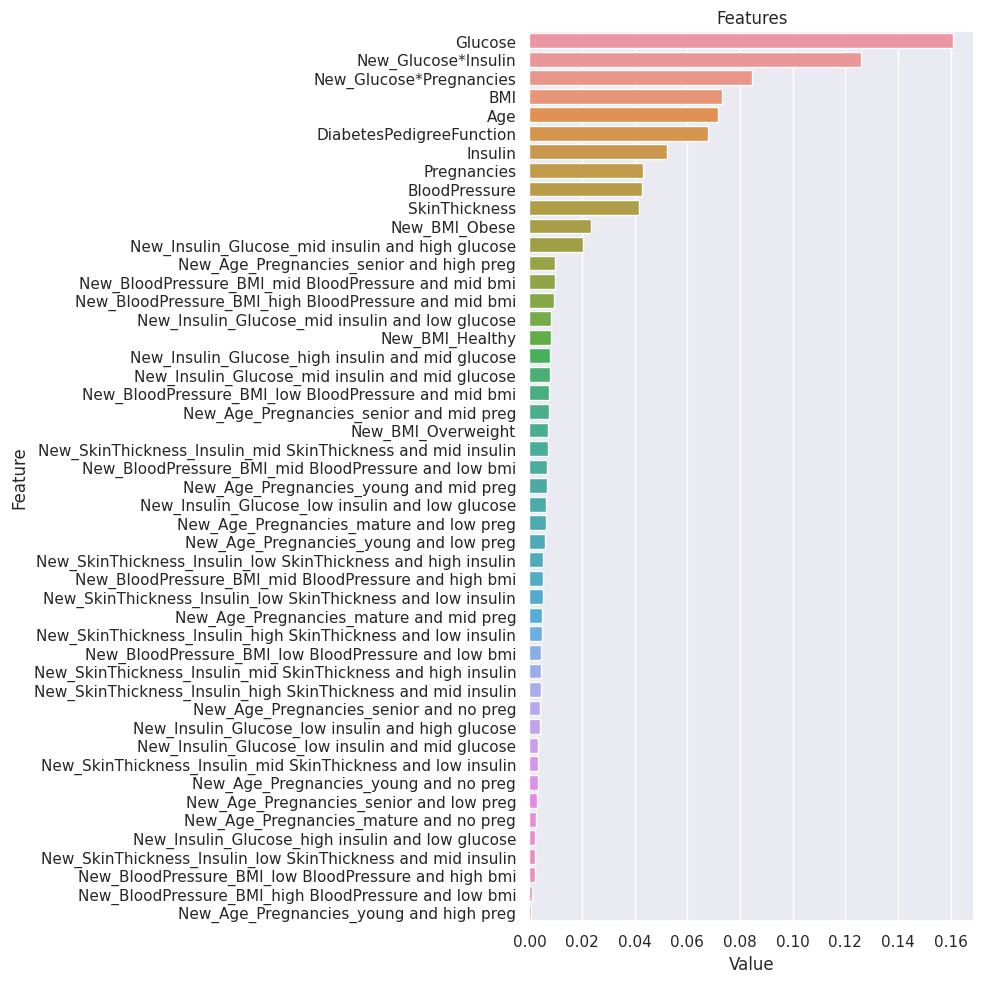

In [72]:
# creating function to visualize:

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)